<a href="https://colab.research.google.com/github/rsanchezgarc/AI-ML-analytics-IE/blob/main/notebooks%20/lecture_3/mageClassificationML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image classification

100%|██████████| 170M/170M [00:05<00:00, 29.0MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
x_train shape (NumPy): (50000, 3, 32, 32)
y_train shape: (50000,)


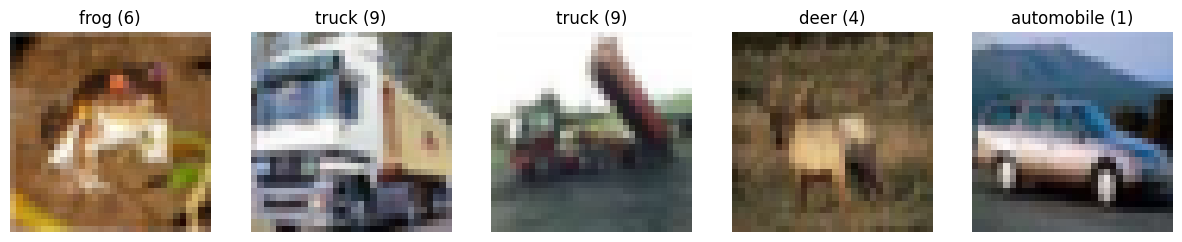

In [1]:
import torch
from torchvision.datasets import CIFAR10
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR10 training dataset
dataset = CIFAR10(root="./data", train=True, download=True, transform=transforms.ToTensor())

# Directly access the data and targets attributes
x_train = torch.tensor(dataset.data ).permute(0, 3, 1, 2).float() / 255.0  # Normalize to [0, 1]
y_train = torch.tensor(dataset.targets)  # Labels as PyTorch tensor

test_dataset = CIFAR10(root="./data", train=False, download=True, transform=transforms.ToTensor())
x_test = torch.tensor(test_dataset.data ).permute(0, 3, 1, 2).float() / 255.0  # Normalize to [0, 1]
y_test = torch.tensor(test_dataset.targets)  # Labels as PyTorch tensor

x_train = x_train.numpy()
y_train = y_train.numpy()
x_test = x_test.numpy()
y_test = y_test.numpy()

print(f"x_train shape (NumPy): {x_train.shape}")  # Should be [50000, 32, 32, 3]
print(f"y_train shape: {y_train.shape}")  # Should be [50000]

# Class names for CIFAR10
class_names = dataset.classes
# Display a few examples
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i].transpose([1,2,0]))  # Display the raw NumPy images (HWC format)
    label_name = class_names[y_train[i].item()]  # Get class name for label
    ax.set_title(f"{label_name} ({y_train[i].item()})")
    ax.axis("off")
plt.show()


Using logistic regression to predict the classes. We treat the images as a flatten vector. (3,32,32) -> (3072,)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Reshape y_train and y_test to 1D arrays
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)


# Train a Logistic Regression model
model = LogisticRegression(max_iter=100, verbose=100)
print(x_train_flat.shape)
print(y_train.shape)
model.fit(x_train_flat, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

(50000, 3072)
(50000,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.8min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.8min
Accuracy: 0.4051
              precision    recall  f1-score   support

           0       0.43      0.48      0.45      1000
           1       0.47      0.49      0.48      1000
           2       0.32      0.28      0.30      1000
           3       0.31      0.23      0.27      1000
           4       0.36      0.29      0.32      1000
           5       0.33      0.37      0.35      1000
           6       0.42      0.49      0.45      1000
           7       0.46      0.44      0.45      1000
           8       0.47      0.52      0.49      1000
           9       0.43      0.46      0.44      1000

    accuracy                           0.41     10000
   macro avg       0.40      0.41      0.40     10000
weighted avg       0.40      0.41      0.40     10000



In [3]:
from sklearn.ensemble import RandomForestClassifier


print(x_train_flat.shape)
print(y_train.shape)
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100,  random_state=42, verbose=1)
model.fit(x_train_flat, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

(50000, 3072)
(50000,)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


Accuracy: 0.4676
              precision    recall  f1-score   support

           0       0.55      0.58      0.57      1000
           1       0.52      0.54      0.53      1000
           2       0.37      0.32      0.35      1000
           3       0.32      0.26      0.29      1000
           4       0.40      0.40      0.40      1000
           5       0.43      0.39      0.41      1000
           6       0.46      0.56      0.51      1000
           7       0.50      0.45      0.48      1000
           8       0.60      0.62      0.61      1000
           9       0.48      0.55      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.46      0.47      0.46     10000



We will start our feature engineering process. We will start computing the mean and the standard deviation of the different colour values.

In [4]:
# Feature Engineering
def extract_features(images):
    # Calculate the mean of the pixel values for each image
    mean_pixel = np.mean(images, axis=(1,2,3))

    # Calculate the standard deviation of the pixel values
    std_dev_pixel = np.std(images, axis=(1,2,3))

    # Calculate the average red, green, blue values for each image
    avg_red = np.mean(images[:,0, :,:], axis=(-1,-2))
    avg_green = np.mean(images[:,1,:,:], axis=(-1,-2))
    avg_blue = np.mean(images[:,2,:,:], axis=(-1,-2))
    # Stack the features
    features = np.column_stack((mean_pixel, std_dev_pixel, avg_red, avg_green, avg_blue))
    return features

# Extract features for training and testing sets
x_train_features = extract_features(x_train)
x_test_features = extract_features(x_test)

# Train a Random Forest Classifier using the extracted features
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1)
model_rf.fit(x_train_features, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(x_test_features)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy with Features: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   10.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


Random Forest Accuracy with Features: 0.2616
              precision    recall  f1-score   support

           0       0.40      0.39      0.40      1000
           1       0.25      0.28      0.27      1000
           2       0.21      0.17      0.19      1000
           3       0.19      0.17      0.18      1000
           4       0.25      0.23      0.24      1000
           5       0.19      0.16      0.17      1000
           6       0.30      0.32      0.31      1000
           7       0.22      0.23      0.22      1000
           8       0.31      0.35      0.33      1000
           9       0.27      0.31      0.29      1000

    accuracy                           0.26     10000
   macro avg       0.26      0.26      0.26     10000
weighted avg       0.26      0.26      0.26     10000



In [5]:
# Feature Engineering with Color Histograms
def extract_features_histogram(images, num_bins=8):
    features = []
    for image in images:
        # Separate color channels
        r = image[:, :, 0].flatten()
        g = image[:, :, 1].flatten()
        b = image[:, :, 2].flatten()

        # Calculate histograms for each channel
        r_hist, _ = np.histogram(r, bins=num_bins, range=(0, 1))
        g_hist, _ = np.histogram(g, bins=num_bins, range=(0, 1))
        b_hist, _ = np.histogram(b, bins=num_bins, range=(0, 1))

        # Combine histograms into a single feature vector
        features.append(np.concatenate((r_hist, g_hist, b_hist)))

    return np.array(features)

# Extract histogram features for training and testing sets
x_train_hist = extract_features_histogram(x_train)
x_test_hist = extract_features_histogram(x_test)



# Train a Random Forest Classifier using histogram features
model_rf_hist = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1)
model_rf_hist.fit(x_train_hist, y_train)
y_pred_rf_hist = model_rf_hist.predict(x_test_hist)
accuracy_rf_hist = accuracy_score(y_test, y_pred_rf_hist)
print(f"Random Forest Accuracy with Histograms: {accuracy_rf_hist}")
print(classification_report(y_test, y_pred_rf_hist))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


Random Forest Accuracy with Histograms: 0.2121
              precision    recall  f1-score   support

           0       0.27      0.31      0.29      1000
           1       0.23      0.26      0.24      1000
           2       0.21      0.19      0.20      1000
           3       0.18      0.14      0.16      1000
           4       0.19      0.21      0.20      1000
           5       0.20      0.14      0.17      1000
           6       0.22      0.24      0.23      1000
           7       0.13      0.12      0.12      1000
           8       0.19      0.20      0.20      1000
           9       0.26      0.30      0.28      1000

    accuracy                           0.21     10000
   macro avg       0.21      0.21      0.21     10000
weighted avg       0.21      0.21      0.21     10000



In [6]:
# Function to extract features from image patches
def extract_patch_features(image, patch_size=(4, 4), num_bins=8):
    height, width, channels = image.shape
    patch_features = []
    for i in range(0, height, patch_size[0]):
        for j in range(0, width, patch_size[1]):
            patch = image[..., i:i + patch_size[0], j:j + patch_size[1]]
            # Check if the patch is valid
            if patch.shape[-2:] == patch_size:
                # Color Histograms for each channel
                r_hist, _ = np.histogram(patch[0, ...].flatten(), bins=num_bins, range=(0, 1))
                g_hist, _ = np.histogram(patch[1, ...].flatten(), bins=num_bins, range=(0, 1))
                b_hist, _ = np.histogram(patch[2, ...].flatten(), bins=num_bins, range=(0, 1))

                patch_features.append(np.concatenate((r_hist, g_hist, b_hist)))
    return np.array(patch_features)

# Extract features for training and testing sets
x_train_patch_features = [extract_patch_features(image) for image in x_train]
x_test_patch_features = [extract_patch_features(image) for image in x_test]
# Flatten the patch features and handle different patch numbers
x_train_flat_patches = [feature.flatten() for feature in x_train_patch_features]
x_test_flat_patches = [feature.flatten() for feature in x_test_patch_features]


# Pad shorter feature arrays
max_len = max(len(arr) for arr in x_train_flat_patches + x_test_flat_patches)
x_train_padded = np.array([np.pad(arr, (0, max_len - len(arr)), 'constant') for arr in x_train_flat_patches])
x_test_padded = np.array([np.pad(arr, (0, max_len - len(arr)), 'constant') for arr in x_test_flat_patches])


# Train a Random Forest Classifier
model_rf_patch = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1)
print(x_train_padded.shape)
model_rf_patch.fit(x_train_padded, y_train)

# Make predictions
y_pred_rf_patch = model_rf_patch.predict(x_test_padded)

# Evaluate the model
accuracy_rf_patch = accuracy_score(y_test, y_pred_rf_patch)
print(f"Random Forest Accuracy with Patch Features: {accuracy_rf_patch}")
print(classification_report(y_test, y_pred_rf_patch))

(50000, 192)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   12.1s


Random Forest Accuracy with Patch Features: 0.2884
              precision    recall  f1-score   support

           0       0.34      0.35      0.34      1000
           1       0.25      0.24      0.25      1000
           2       0.28      0.21      0.24      1000
           3       0.26      0.22      0.23      1000
           4       0.27      0.32      0.29      1000
           5       0.27      0.27      0.27      1000
           6       0.30      0.36      0.33      1000
           7       0.26      0.17      0.21      1000
           8       0.33      0.38      0.35      1000
           9       0.30      0.35      0.33      1000

    accuracy                           0.29     10000
   macro avg       0.29      0.29      0.28     10000
weighted avg       0.29      0.29      0.28     10000



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


In [7]:
from skimage.feature import hog

#https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html


# Feature Engineering with HOG
def extract_hog_features(images):
    hog_features = []
    for image in images:
        fd = hog(image.transpose([1,2,0]), orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=False, channel_axis=-1)
        hog_features.append(fd)
    return np.array(hog_features)

# Extract HOG features for training and testing sets
x_train_hog = extract_hog_features(x_train)
x_test_hog = extract_hog_features(x_test)

# Reshape y_train and y_test to 1D arrays (if not already done)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Train a Logistic Regression model using HOG features
model_hog = LogisticRegression(max_iter=1000, verbose=100)
model_hog.fit(x_train_hog, y_train)
y_pred_hog = model_hog.predict(x_test_hog)
accuracy_hog = accuracy_score(y_test, y_pred_hog)
print(f"Logistic Regression Accuracy with HOG: {accuracy_hog}")
print(classification_report(y_test, y_pred_hog))

# Train a Random Forest Classifier using HOG features
model_rf_hog = RandomForestClassifier(n_estimators=100, random_state=42, verbose=0)
model_rf_hog.fit(x_train_hog, y_train)
y_pred_rf_hog = model_rf_hog.predict(x_test_hog)
accuracy_rf_hog = accuracy_score(y_test, y_pred_rf_hog)
print(f"Random Forest Accuracy with HOG: {accuracy_rf_hog}")
print(classification_report(y_test, y_pred_rf_hog))

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.2min
Logistic Regression Accuracy with HOG: 0.5407
              precision    recall  f1-score   support

           0       0.60      0.61      0.61      1000
           1       0.63      0.64      0.63      1000
           2       0.47      0.41      0.44      1000
           3       0.40      0.32      0.36      1000
           4       0.46      0.50      0.48      1000
           5       0.44      0.41      0.43      1000
           6       0.52      0.64      0.58      1000
           7       0.58      0.58      0.58      1000
           8       0.60      0.60      0.60      1000
           9       0.65      0.68      0.67      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000

Random Forest Accuracy with HOG: 0.5168
              precision    recall

Features we can try

Color-based features:

- Color histograms in different color spaces (RGB, HSV, LAB)
- Color moments (mean, variance, skewness per channel)
- Dominant colors and their proportions


Texture features:

- Local Binary Patterns (LBP) - particularly uniform LBP
- Haralick features from Gray Level Co-occurrence Matrix (GLCM)
- Gabor filters at different scales and orientations


Edge and shape features:

- Histogram of Oriented Gradients (HOG)
- Edge direction histograms
- SIFT (Scale-Invariant Feature Transform) descriptors
- Canny edge detection followed by contour features

Statistical features:

- Mean and standard deviation of pixel values
- Entropy measures
- Zernike moments
- Hu moments for shape description

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.feature import local_binary_pattern

# Combined Feature Extraction Function
def extract_features(images):
    features = []
    for image in images:
        image = image.transpose([1,2,0])
        # Color Histogram (RGB)
        r_hist, _ = np.histogram(image[:, :, 0].flatten(), bins=8, range=(0, 1))
        g_hist, _ = np.histogram(image[:, :, 1].flatten(), bins=8, range=(0, 1))
        b_hist, _ = np.histogram(image[:, :, 2].flatten(), bins=8, range=(0, 1))
        color_features = np.concatenate((r_hist, g_hist, b_hist))

        # LBP (Texture)
        gray_image = np.mean(image, axis=2) # Convert to grayscale
        lbp = local_binary_pattern(gray_image, 8, 1, method='uniform')
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=10, range=(0, 10))

        # HOG (Edge/Shape)
        hog_features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, channel_axis=-1)

        # Statistical Features
        mean_pixel = np.mean(image)
        std_dev_pixel = np.std(image)


        combined_features = np.concatenate((color_features, lbp_hist, hog_features, [mean_pixel, std_dev_pixel]))
        features.append(combined_features)
    return np.array(features)

# Extract features
x_train_features = extract_features(x_train)
x_test_features = extract_features(x_test)


# Train a Random Forest Classifier
model_rf_combined = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1)
model_rf_combined.fit(x_train_features, y_train)

# Make predictions
y_pred_rf_combined = model_rf_combined.predict(x_test_features)

# Evaluate
accuracy_rf_combined = accuracy_score(y_test, y_pred_rf_combined)
print(f"Random Forest Accuracy with Combined Features: {accuracy_rf_combined}")
print(classification_report(y_test, y_pred_rf_combined))

/usr/local/lib/python3.10/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


Random Forest Accuracy with Combined Features: 0.5609
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1000
           1       0.61      0.72      0.66      1000
           2       0.54      0.39      0.45      1000
           3       0.36      0.29      0.32      1000
           4       0.52      0.54      0.53      1000
           5       0.45      0.54      0.49      1000
           6       0.62      0.68      0.65      1000
           7       0.61      0.55      0.58      1000
           8       0.62      0.62      0.62      1000
           9       0.59      0.65      0.62      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.56      0.56      0.56     10000



In [11]:
#Now we implement a simple CNN with pytorch

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import DataLoader

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

# Data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

# Evaluation
correct = 0
total = 0
y_preds = []
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_preds += [predicted]
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

predicted = torch.cat(y_preds).cpu().detach().numpy()
print(classification_report(y_test, predicted))

Files already downloaded and verified
Files already downloaded and verified
[1,   200] loss: 1.678
[1,   400] loss: 1.340
[1,   600] loss: 1.213
[2,   200] loss: 1.037
[2,   400] loss: 0.957
[2,   600] loss: 0.924
[3,   200] loss: 0.810
[3,   400] loss: 0.817
[3,   600] loss: 0.805
[4,   200] loss: 0.701
[4,   400] loss: 0.694
[4,   600] loss: 0.682
[5,   200] loss: 0.584
[5,   400] loss: 0.590
[5,   600] loss: 0.593
[6,   200] loss: 0.475
[6,   400] loss: 0.504
[6,   600] loss: 0.516
[7,   200] loss: 0.397
[7,   400] loss: 0.400
[7,   600] loss: 0.421
[8,   200] loss: 0.304
[8,   400] loss: 0.336
[8,   600] loss: 0.367
[9,   200] loss: 0.242
[9,   400] loss: 0.273
[9,   600] loss: 0.285
[10,   200] loss: 0.190
[10,   400] loss: 0.202
[10,   600] loss: 0.231
Accuracy of the network on the 10000 test images: 71 %
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1000
           1       0.85      0.79      0.82      1000
           2 